In [1]:
!pip install pandas numpy seaborn matplotlib tensorflow keras sklearn &> /dev/null

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201

import time
start_time = time.time()

In [3]:
PATH_DATA_TRAIN = '../input/cars-data-ttv-80-10-10/data-raw/data-raw/train'
PATH_DATA_TEST = '../input/cars-data-ttv-80-10-10/data-raw/data-raw/test'
PATH_DATA_VALIDATION = '../input/cars-data-ttv-80-10-10/data-raw/data-raw/validation'
PATH_SAVED_MODEL = 'densenet201.h5'

# Load Dataset As Generators

In [4]:
generator = ImageDataGenerator(rescale = 1./255.)

target_size = (100, 100)
batch_size = 32

train_batches = generator.flow_from_directory(
    PATH_DATA_TRAIN, class_mode='categorical', 
    batch_size=batch_size, target_size=target_size
)

validation_batches = generator.flow_from_directory(
    PATH_DATA_VALIDATION, class_mode='categorical',  
    batch_size=batch_size, target_size=target_size
)

test_batches = generator.flow_from_directory(
    PATH_DATA_TEST, class_mode='categorical', shuffle=False, 
    batch_size=batch_size, target_size=target_size
)

Found 12971 images belonging to 7 classes.
Found 1612 images belonging to 7 classes.
Found 1602 images belonging to 7 classes.


In [5]:
# preview data (batch size, width, height, colors)
print('x_train shape:', train_batches[0][0].shape)
print('x_validation shape:', validation_batches[0][0].shape)
print('x_test shape:', test_batches[0][0].shape)
print('y_train shape:', train_batches[0][1].shape)
print('y_validation shape:', validation_batches[0][1].shape)
print('y_test shape:', test_batches[0][1].shape)

x_train shape: (32, 100, 100, 3)
x_validation shape: (32, 100, 100, 3)
x_test shape: (32, 100, 100, 3)
y_train shape: (32, 7)
y_validation shape: (32, 7)
y_test shape: (32, 7)


In [6]:
# input & output shape
input_shape = train_batches[0][0][0].shape
output_shape = len(train_batches[0][1][0])

# display input & output shape
print('Input Shape:', input_shape)
print('Output Shape:', output_shape)

Input Shape: (100, 100, 3)
Output Shape: 7


# Build & Compile Model

In [7]:
model = DenseNet201(
    input_shape=input_shape,
    classes=output_shape,
    weights=None,
#     classifier_activation='softmax'
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-12-07 19:48:47.027139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 19:48:47.028109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 19:48:47.344417: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 19:48:47.345343: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 19:48:47.346098: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

# Train Model

In [8]:
# train model
r = model.fit(train_batches, validation_data=validation_batches, epochs=100)

# save model
model.save(PATH_SAVED_MODEL)

# load model
# model = load_model(PATH_SAVED_MODEL)

2022-12-07 19:48:56.731417: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-07 19:49:16.986453: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


406/406 [==============================] - 279s 602ms/step - loss: 1.7533 - accuracy: 0.3222 - val_loss: 9.6382 - val_accuracy: 0.2754
Epoch 2/100
406/406 [==============================] - 154s 380ms/step - loss: 1.5614 - accuracy: 0.3812 - val_loss: 3.3089 - val_accuracy: 0.2171
Epoch 3/100
406/406 [==============================] - 155s 381ms/step - loss: 1.4534 - accuracy: 0.4228 - val_loss: 1.9913 - val_accuracy: 0.3598
Epoch 4/100
406/406 [==============================] - 154s 379ms/step - loss: 1.3762 - accuracy: 0.4565 - val_loss: 3.0313 - val_accuracy: 0.2357
Epoch 5/100
406/406 [==============================] - 154s 378ms/step - loss: 1.3079 - accuracy: 0.4833 - val_loss: 4.7235 - val_accuracy: 0.1340
Epoch 6/100
406/406 [==============================] - 154s 380ms/step - loss: 1.1803 - accuracy: 0.5394 - val_loss: 1.3341 - val_accuracy: 0.5323
Epoch 7/100
406/406 [==============================] - 157s 387ms/step - loss: 1.1273 - accuracy: 0.5610 - val_loss: 4.1503 - val_

# Evaluate Model's Training & Validation Results

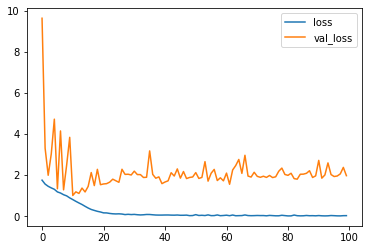

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

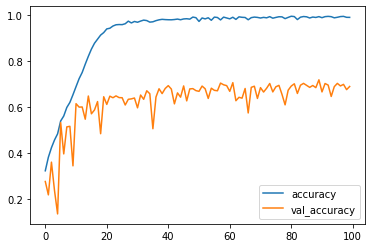

In [10]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Generate Predictions With Model

In [11]:
y_pred = model.predict(test_batches).argmax(axis=1)

In [12]:
model.evaluate(test_batches)

51/51 [==============================] - 16s 307ms/step - loss: 1.9804 - accuracy: 0.6866


[1.980368971824646, 0.6866416931152344]

# Evaluate Model's Prediction Results

In [13]:
# generate classification report
class_labels = list(test_batches.class_indices.keys())
report = classification_report(test_batches.classes, y_pred, target_names=class_labels, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
hatchback,0.563830,0.339744,0.424000,156.000000
mpv,0.702703,0.722222,0.712329,108.000000
sedan,0.634529,0.683575,0.658140,414.000000
sport,0.685771,0.792237,0.735169,438.000000
suv,0.836207,0.683099,0.751938,284.000000
truck,0.854305,0.806250,0.829582,160.000000
wagon,0.258065,0.380952,0.307692,42.000000
accuracy,0.686642,0.686642,0.686642,0.686642
macro avg,0.647915,0.629726,0.631264,1602.000000
weighted avg,0.694084,0.686642,0.684617,1602.000000


Text(0.5, 69.0, 'Predicted Values')

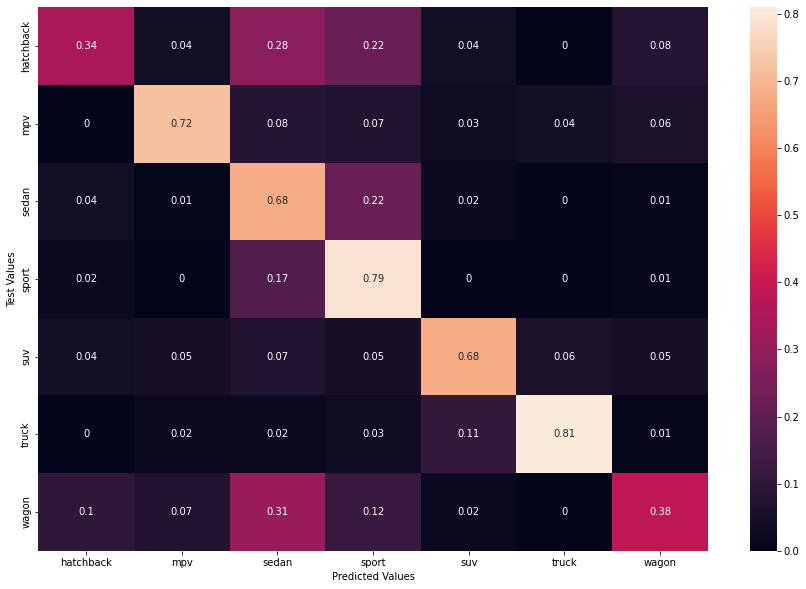

In [14]:
# compute confusion matrix
matrix = confusion_matrix(test_batches.classes, y_pred)

# normalize confusion matrix
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.around(matrix, decimals=2)

# generate confusion matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Test Values')
plt.xlabel('Predicted Values')

# Compute Execution Time

In [15]:
execution_time_s = round(time.time() - start_time, 2)
execution_time_m = round(execution_time_s/60, 2)
execution_time_h = round(execution_time_m/60, 2)

print('Execution Time (Hours):', execution_time_h)
print('Execution Time (Minutes):', execution_time_m)
print('Execution Time (Seconds):', execution_time_s)

Execution Time (Hours): 4.45
Execution Time (Minutes): 266.85
Execution Time (Seconds): 16010.75
